In [ ]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

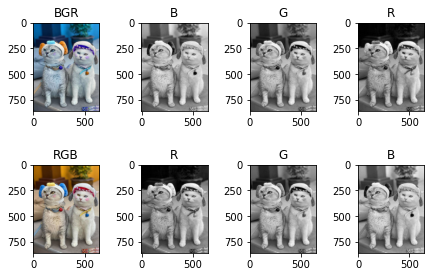

In [ ]:
#ITEM 1.1
image = cv2.imread("/content/image.jpg")

im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ((ax1, ax2 ,ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
plt.tight_layout(pad=0.2, w_pad=0.5, h_pad=0)

red1,green1,blue1 = image[:,:,0], image[:,:,1], image[:,:,2]
blue2,green2,red2 = im_bgr[:,:,0], im_bgr[:,:,1], im_bgr[:,:,2]


#BGR
ax1.imshow(image)
ax1.set_title('BGR')

#BGR-B
ax2.imshow(blue1, cmap=plt.get_cmap('gray'))
ax2.set_title('B')

#BGR-G
ax3.imshow(green1, cmap=plt.get_cmap('gray'))
ax3.set_title('G')

#BGR-R
ax4.imshow(red1, cmap=plt.get_cmap('gray'))
ax4.set_title('R')

#RGB
ax5.imshow(im_rgb)
ax5.set_title('RGB')

#RGB-R
ax6.imshow(red2, cmap=plt.get_cmap('gray'))
ax6.set_title('R')

#RGB-G
ax7.imshow(green2, cmap=plt.get_cmap('gray'))
ax7.set_title('G')

#RGB-B
ax8.imshow(blue2, cmap=plt.get_cmap('gray'))
ax8.set_title('B')
plt.show()


In [ ]:
#ITEM 1.2
print(image.shape)
reshape_array = np.transpose(image)
print(reshape_array.shape)

(895, 700, 3)
(3, 700, 895)


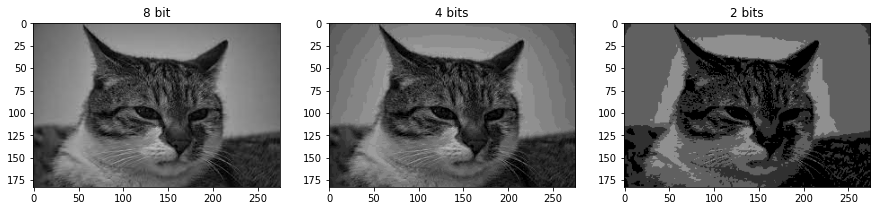

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#ITEM 1.3
#Showing Board
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10))
def Quan_cal(s_i,s_max,s_min,bit_depth):
  q_level = pow(2,bit_depth)
  q = math.floor(((s_i - s_min)/(s_max-s_min))*q_level)

  #map to unit8 format to be shown on devices
  q = (q/q_level)*(s_max+1)
  return q

def Quantization(image_src,bit_depth_1,bit_depth_2):

  read_image = cv2.imread(image_src)
  ori_img = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)
  reduced_img_1 = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)
  reduced_img_2 = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)

  s_max = np.amax(ori_img)
  s_min = 0

  for row in range (0,len(ori_img)):   
    for col in range (0,len(ori_img[row])): 
      reduced_img_1[row][col][0] = Quan_cal(reduced_img_1[row][col][0], s_max, s_min, bit_depth_1)
      reduced_img_1[row][col][1] = Quan_cal(reduced_img_1[row][col][1], s_max, s_min, bit_depth_1)
      reduced_img_1[row][col][2] = Quan_cal(reduced_img_1[row][col][2], s_max, s_min, bit_depth_1)

      reduced_img_2[row][col][0] = Quan_cal(reduced_img_2[row][col][0], s_max, s_min, bit_depth_2)
      reduced_img_2[row][col][1] = Quan_cal(reduced_img_2[row][col][1], s_max, s_min, bit_depth_2)
      reduced_img_2[row][col][2] = Quan_cal(reduced_img_2[row][col][2], s_max, s_min, bit_depth_2)

  ax1.imshow(ori_img)
  ax1.set_title('8 bit')
  ax2.imshow(reduced_img_1, cmap ='gray')
  title = str(bit_depth_1)+' bits'
  ax2.set_title(title)
  ax3.imshow(reduced_img_2, cmap ='gray')
  title2 = str(bit_depth_2)+' bits'
  ax3.set_title(title2)

# ****************** MAIN ************************
bit_depth_1 = 4
bit_depth_2 = 2
image_source = "/content/g.jpg"
Quantization(image_source, bit_depth_1, bit_depth_2)
